# Aim:

Implement, train, and comparatively evaluate both a basic Multilayer Perceptron (MLP) and the classic LeNet-5 Convolutional Neural Network (CNN) for image classification on the Fashion MNIST dataset.

In [23]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('X_train:', train_X.shape)
print('Y_train:', train_y.shape)
print('X_test:', test_X.shape)
print('Y_test:', test_y.shape)

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)


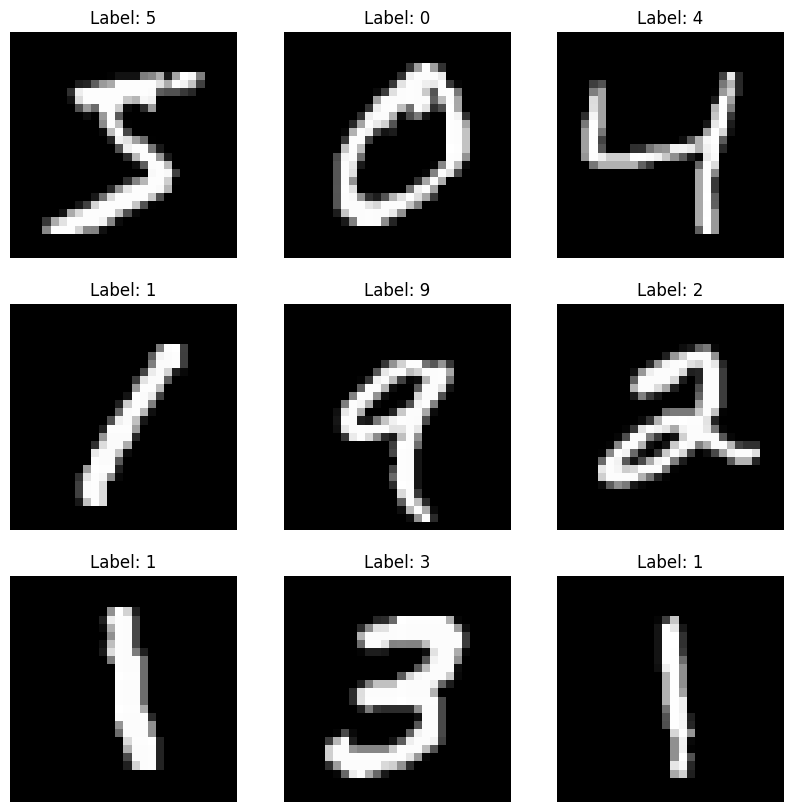

In [24]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_X[i], cmap='gray')
    plt.title(f'Label: {train_y[i]}')
    plt.axis('off')
plt.show()

In [27]:
import numpy as np
from tensorflow.keras.utils import to_categorical

train_y_encoded = to_categorical(train_y, num_classes=10)
test_y_encoded = to_categorical(test_y, num_classes=10)

train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

train_X = np.expand_dims(train_X, axis=-1)
test_X = np.expand_dims(test_X, axis=-1)

In [30]:
train_y_encoded = to_categorical(train_y, num_classes=10)
test_y_encoded = to_categorical(test_y, num_classes=10)

CNN

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_model(input_shape=(28, 28, 1)):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model

model = create_model()
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_X, train_y_encoded, epochs=10, batch_size=128, validation_split=0.1)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8343 - loss: 0.5502 - val_accuracy: 0.9825 - val_loss: 0.0629
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9813 - loss: 0.0626 - val_accuracy: 0.9877 - val_loss: 0.0473
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9871 - loss: 0.0441 - val_accuracy: 0.9887 - val_loss: 0.0434
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9905 - loss: 0.0311 - val_accuracy: 0.9893 - val_loss: 0.0402
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9936 - loss: 0.0230 - val_accuracy: 0.9907 - val_loss: 0.0377
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9938 - loss: 0.0199 - val_accuracy: 0.9905 - val_loss: 0.0338
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9957 - loss: 0.0142 - val_accuracy: 0.9900 - val_loss: 0.0351
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9966 - loss: 0.0113 - val_accu

Dense layer architecture

In [39]:
def varying_layers():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model

varying_layers = varying_layers()
varying_layers.summary()
varying_layers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
varying_layers.fit(train_X, train_y_encoded, epochs=10, batch_size=128, validation_split=0.1)

c:\Users\nihar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7841 - loss: 0.7091 - val_accuracy: 0.9690 - val_loss: 0.1125
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9669 - loss: 0.1065 - val_accuracy: 0.9793 - val_loss: 0.0684
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9766 - loss: 0.0758 - val_accuracy: 0.9860 - val_loss: 0.0512
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9836 - loss: 0.0545 - val_accuracy: 0.9867 - val_loss: 0.0467
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9865 - loss: 0.0421 - val_accuracy: 0.9888 - val_loss: 0.0422
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9886 - loss: 0.0349 - val_accuracy: 0.9858 - val_loss: 0.0478
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9915 - loss: 0.0292 - val_accuracy: 0.9902 - val_loss: 0.0382
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9927 - loss: 0.0238 - val_acc

Lenet5

In [37]:
def create_lenet5():
    model = Sequential()
    model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

lenet5_model = create_lenet5()
lenet5_model.summary()
lenet5_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lenet5_model.fit(train_X, train_y_encoded, epochs=10, batch_size=128, validation_split=0.1)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7632 - loss: 0.7580 - val_accuracy: 0.9693 - val_loss: 0.1038
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9688 - loss: 0.1005 - val_accuracy: 0.9782 - val_loss: 0.0718
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9786 - loss: 0.0706 - val_accuracy: 0.9848 - val_loss: 0.0558
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9830 - loss: 0.0543 - val_accuracy: 0.9862 - val_loss: 0.0485
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9864 - loss: 0.0415 - val_accuracy: 0.9850 - val_loss: 0.0543
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9879 - loss: 0.0390 - val_accuracy: 0.9877 - val_loss: 0.0466
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9892 - loss: 0.0332 - val_accuracy: 0.9870 - val_loss: 0.0442
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9913 - loss: 0.0272 - val_accuracy: 0.

In [40]:
results_basic_cnn = model.evaluate(test_X, test_y_encoded)
results_varying_layers = varying_layers.evaluate(test_X, test_y_encoded)
results_lenet5 = lenet5_model.evaluate(test_X, test_y_encoded)

print("Basic CNN Test Accuracy:", results_basic_cnn[1])
print("Varying Layers CNN Test Accuracy:", results_varying_layers[1])
print("LeNet-5 Test Accuracy:", results_lenet5[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9883 - loss: 0.0350
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9806 - loss: 0.0697
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9834 - loss: 0.0434
Basic CNN Test Accuracy: 0.991599977016449
Varying Layers CNN Test Accuracy: 0.9853000044822693
LeNet-5 Test Accuracy: 0.9872999787330627


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


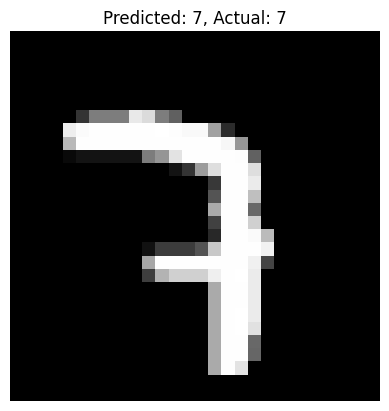

In [44]:
import random
import numpy as np
import matplotlib.pyplot as plt

def getting_random_image(model, train_X, train_y_encoded):
    random_index = random.randint(0, len(train_X) - 1)
    random_image = train_X[random_index]
    actual_label = np.argmax(train_y_encoded[random_index])
    
    random_image_expanded = np.expand_dims(random_image, axis=0)
    predicted_label = np.argmax(model.predict(random_image_expanded))
    
    plt.imshow(random_image.squeeze(), cmap='gray')
    plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
    plt.axis('off')
    plt.show()

getting_random_image(model, train_X, train_y_encoded)

In [50]:
history_basic_cnn = model.fit(train_X, train_y_encoded, epochs=10, batch_size=128, validation_split=0.1)
history_varying_layers = varying_layers.fit(train_X, train_y_encoded, epochs=10, batch_size=128, validation_split=0.1)
history_lenet5 = lenet5_model.fit(train_X, train_y_encoded, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9987 - loss: 0.0044 - val_accuracy: 0.9923 - val_loss: 0.0463
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9994 - loss: 0.0016 - val_accuracy: 0.9930 - val_loss: 0.0469
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.9928 - val_loss: 0.0403
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9999 - loss: 2.4909e-04 - val_accuracy: 0.9930 - val_loss: 0.0423
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9992 - loss: 0.0022 - val_accuracy: 0.9925 - val_loss: 0.0428
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.9915 - val_loss: 0.0477
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9983 - loss: 0.0050 - val_accuracy: 0.9930 - val_loss: 0.0456
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9999 - loss: 3.7153e-04 - 

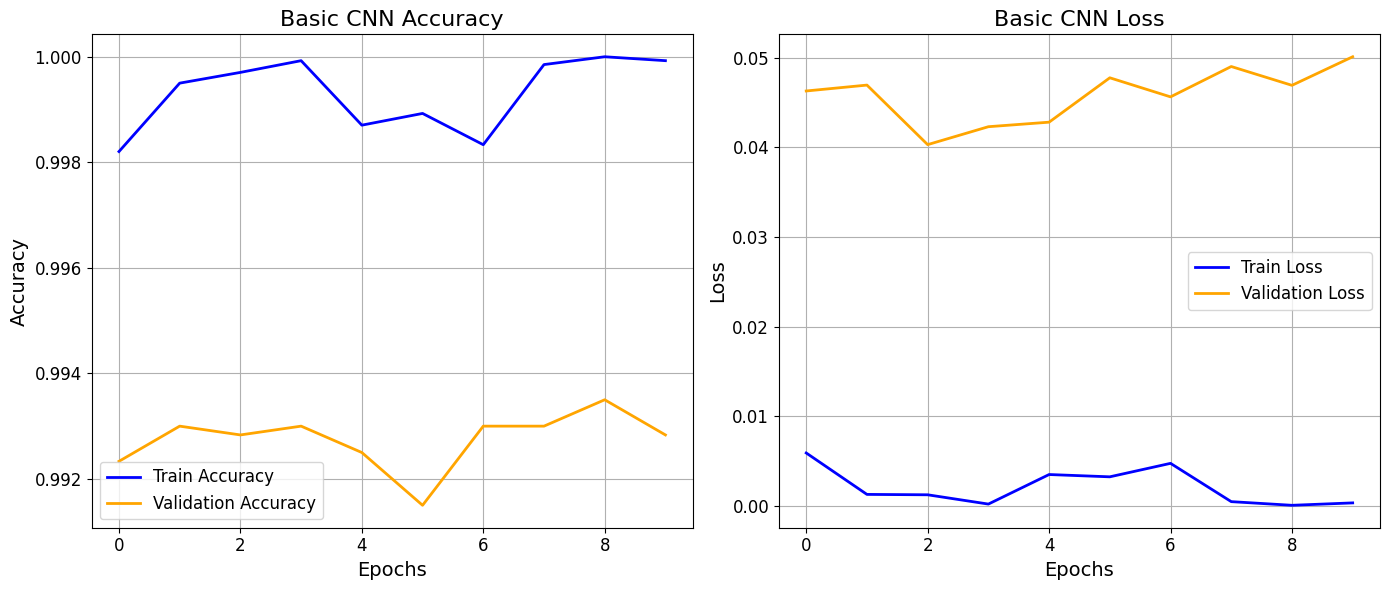

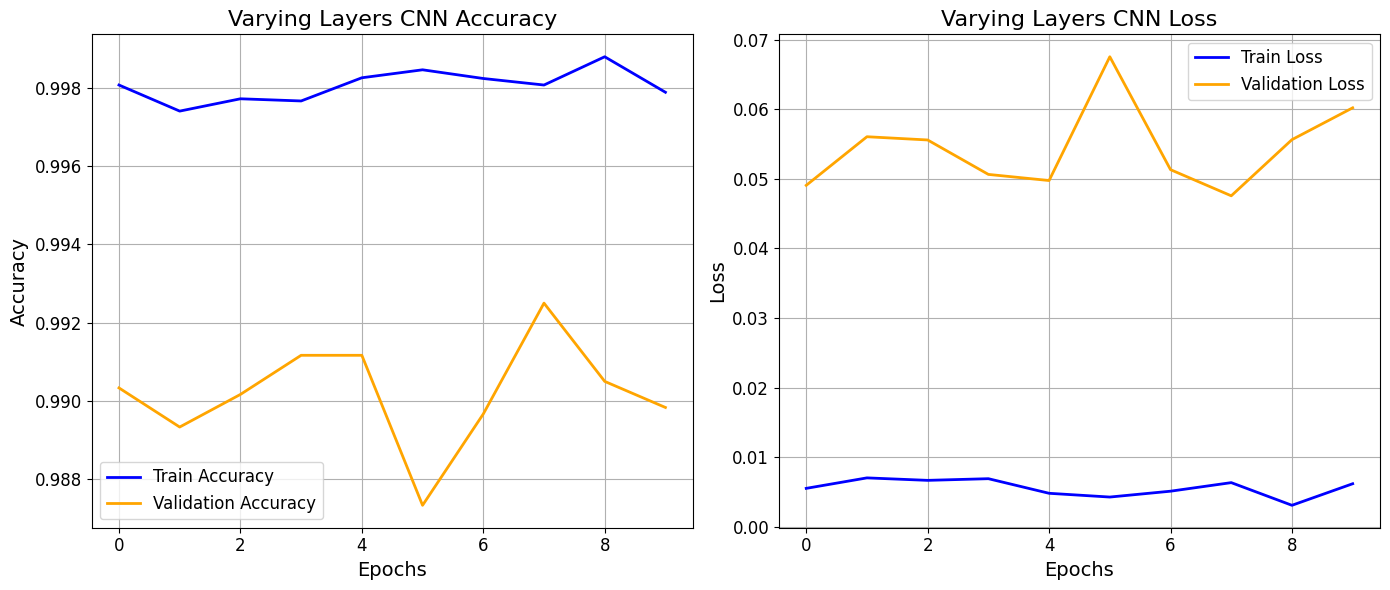

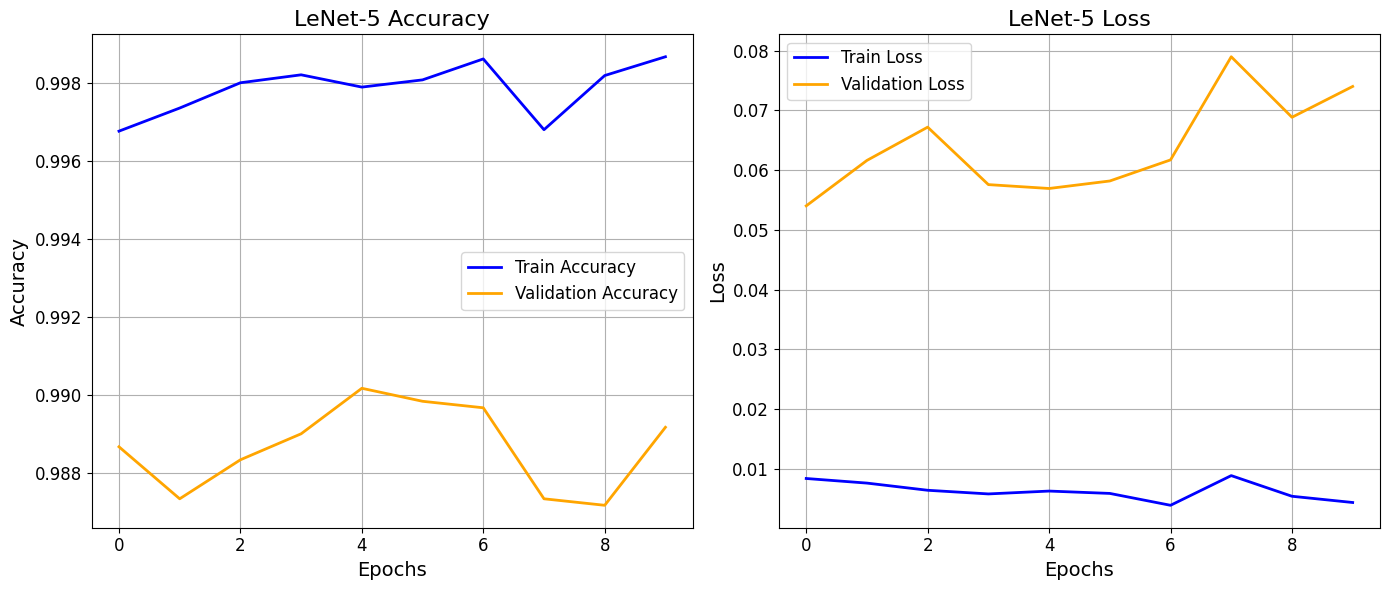

In [60]:
import matplotlib.pyplot as plt

def plot_training_curves(history, model_name):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linewidth=2)
    plt.title(f'{model_name} Accuracy', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.legend(fontsize=12)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='blue', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
    plt.title(f'{model_name} Loss', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.legend(fontsize=12)

    plt.tight_layout()
    
    plt.show()


plot_training_curves(history_basic_cnn, 'Basic CNN')
plot_training_curves(history_varying_layers, 'Varying Layers CNN')
plot_training_curves(history_lenet5, 'LeNet-5')

the basic cnn outperformed the other with varying layer(dense layer) and lenet_5
